<a href="https://colab.research.google.com/github/phuri7987/229351-StatisticalLearning/blob/main/229351_LAB09_640510703.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### ปฏิบัติการครั้งที่ 9

ดาวน์โหลดข้อมูลอุณหภูมิสูงสุดรายวันปี 1998-2019 จาก link ข้างล่างนี้  
https://donlapark.pages.dev/229351/data/CM_temp.csv

1. เปลี่ยนจากข้อมูลรายวันให้เป็นข้อมูลค่าเฉลี่ยรายเดือน
2. จงแบ่งข้อมูลโดยให้ Test set เป็นข้อมูลของ 2 ปีสุดท้ายและ Training set เป็นข้อมูลที่เหลือ
3. ลองสร้างโมเดล SARIMA อันดับต่างๆ แล้วระบุโมเดลที่ดีที่สุด
4. จงแสดงแผนภาพของข้อมูลจริงกับข้อมูลที่ได้ในข้อ 3

In [ ]:
# ONLY RUN THIS WHEN THERE IS AN ERROR
!pip install --user statsmodels==0.13.1

In [1]:
!wget -O CM_temp.csv https://donlapark.pages.dev/229351/data/CM_temp.csv

--2025-09-19 18:08:54--  https://donlapark.pages.dev/229351/data/CM_temp.csv
Resolving donlapark.pages.dev (donlapark.pages.dev)... 172.66.47.56, 172.66.44.200, 2606:4700:310c::ac42:2cc8, ...
Connecting to donlapark.pages.dev (donlapark.pages.dev)|172.66.47.56|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 139473 (136K) [text/csv]
Saving to: ‘CM_temp.csv’

CM_temp.csv         100%[===================>] 136.20K  --.-KB/s    in 0.02s   

2025-09-19 18:08:54 (6.21 MB/s) - ‘CM_temp.csv’ saved [139473/139473]



In [2]:
!pip3 install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 28.5 MB/s eta 0:00:00


In [4]:
# import module ที่ต้องใช้
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import pmdarima as pm
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.arima.model import ARIMA


In [7]:
# ฟังก์ชันที่เปลี่ยน string ให้เป็น datetime
from datetime import datetime
def parser(dates):
  return datetime.strptime(dates, '%Y-%m-%d')

# parse_dates ชื่อของคอลัมน์ที่จะเปลี่ยนให้เป็น datetime
# index_col ชื่อของคอลัมน์ที่จะให้เป็น index
# date_parser ฟังก์ชันที่เปลี่ยน string ให้เป็น datetime
data = pd.read_csv('CM_temp.csv', parse_dates=['Date'],
                                        index_col='Date',
                                        date_parser=parser)

data.head()

/tmp/ipython-input-4217948466.py:9: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  data = pd.read_csv('CM_temp.csv', parse_dates=['Date'],


,MaxTemp
Date,
1998-01-01,30.6
1998-01-02,32.0
1998-01-03,31.6
1998-01-04,32.1
1998-01-05,31.2


ข้อมูล (สมมติว่าชื่อ `data`) ที่ load มาเป็นข้อมูลรายวัน ทำการหาค่าเฉลี่ยรายเดือนด้วยคำสั่ง

In [15]:
y = data['MaxTemp'].resample("ME").mean()

In [16]:
def rmse(y_true,y_pred):
  # Inputs
  # y_true: actual value, y_pred: predicted values
  # Output: RMSE between y_true and y_pred
  return np.sqrt(np.mean(np.square(y_true-y_pred)))

In [17]:
train = y[:-24]
test = y[-24:]

print(test)

Date
2017-08-31    32.764516
2017-09-30    33.140000
2017-10-31    32.158065
2017-11-30    31.616667
2017-12-31    29.229032
2018-01-31    30.048387
2018-02-28    33.253571
2018-03-31    35.674194
2018-04-30    35.900000
2018-05-31    34.648387
2018-06-30    33.066667
2018-07-31    32.000000
2018-08-31    32.258065
2018-09-30    33.506667
2018-10-31    32.864516
2018-11-30    32.336667
2018-12-31    30.229032
2019-01-31    30.622581
2019-02-28    34.564286
2019-03-31    37.051613
2019-04-30    39.716667
2019-05-31    37.680645
2019-06-30    35.466667
2019-07-31    34.070968
Freq: ME, Name: MaxTemp, dtype: float64


2.

In [18]:
train = y[:-24]
test = y[-24:]

print("Training set length:", len(train))
print("Test set length:", len(test))

Training set length: 235
Test set length: 24


3.

In [19]:
# Import the SARIMA model
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Define the SARIMA model order (non-seasonal and seasonal)
# You will need to experiment with different orders to find the best model
order = (1, 1, 1)
seasonal_order = (1, 1, 1, 12) # Assuming a yearly seasonality (12 months)

# Create the SARIMA model
model = SARIMAX(train, order=order, seasonal_order=seasonal_order)

# Fit the model
model_fit = model.fit()

# Print the model summary
print(model_fit.summary())

# Make predictions on the test set
predictions = model_fit.predict(start=len(train), end=len(train) + len(test) - 1)

# Evaluate the model using RMSE
rmse_value = rmse(test, predictions)
print(f'RMSE: {rmse_value}')

                                     SARIMAX Results                                      
Dep. Variable:                            MaxTemp   No. Observations:                  235
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -344.554
Date:                            Fri, 19 Sep 2025   AIC                            699.109
Time:                                    18:23:40   BIC                            716.122
Sample:                                01-31-1998   HQIC                           705.977
                                     - 07-31-2017                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2351      0.086      2.721      0.007       0.066       0.404
ma.L1         -0.8352      0.052   

4.

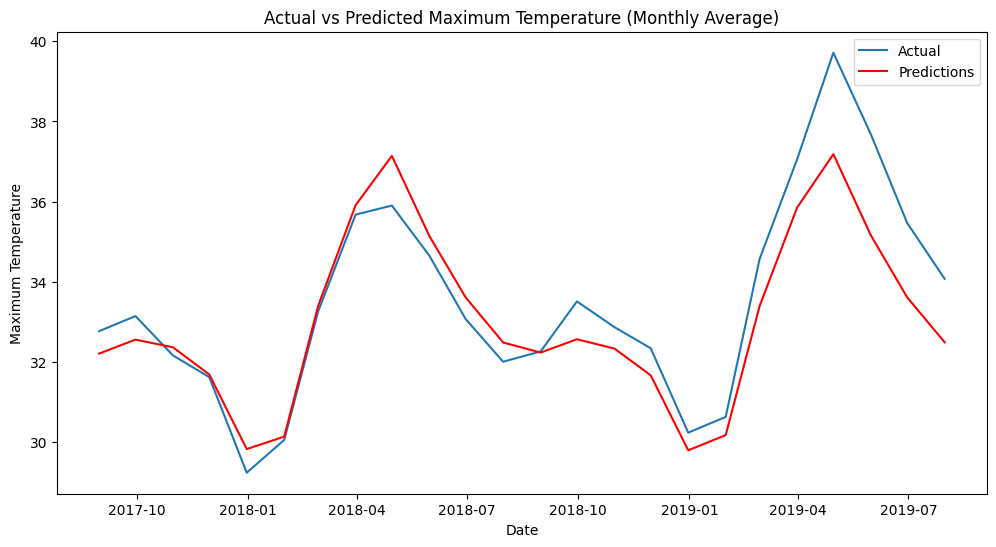

In [20]:
# Plot the actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(test.index, test, label='Actual')
plt.plot(predictions.index, predictions, label='Predictions', color='red')
plt.title('Actual vs Predicted Maximum Temperature (Monthly Average)')
plt.xlabel('Date')
plt.ylabel('Maximum Temperature')
plt.legend()
plt.show()